<a href="https://colab.research.google.com/github/daichi-a/PythonDataAnalyzeClassMaterial/blob/master/PyDataAnalyze_Corr_ID.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd

df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vRC2tj0gfoa45biZUy_w2GIude74RWN_pMCir-oD2M6jcWJLItom41lYMx45Qh78hwFXZzJUPJqzPI_/pub?gid=1133379548&single=true&output=csv')
df.head()

,Unnamed: 0,青森.ave,青森.max.ave,青森.min.ave,青森.25over,秋田.ave,秋田.max.ave,秋田.min.ave,秋田.25over,盛岡.ave,盛岡.max.ave,盛岡.min.ave,盛岡.25over,山形.ave,山形.max.ave,山形.min.ave,山形.25over,仙台.ave,仙台.max.ave,仙台.min.ave,仙台.25over,福島.ave,福島.max.ave,福島.min.ave,福島.25over,水戸.ave,水戸.max.ave,水戸.min.ave,水戸.25over,宇都宮.ave,宇都宮.max.ave,宇都宮.min.ave,宇都宮.25over,さいたま.ave,さいたま.max.ave,さいたま.min.ave,さいたま.25over,前橋.ave,前橋.max.ave,前橋.min.ave,前橋.25over,甲府.ave,甲府.max.ave,甲府.min.ave,甲府.25over,千葉.ave,千葉.max.ave,千葉.min.ave,千葉.25over,東京.ave,東京.max.ave,東京.min.ave,東京.25over,横浜.ave,横浜.max.ave,横浜.min.ave,横浜.25over
0,1977/8,21.5,26.0,17.9,4,22.9,26.5,19.4,6,21.6,26.0,18.1,4,22.9,27.6,19.2,6,22.7,26.1,20.2,6,23.3,27.3,20.2,10,23.1,26.9,20.1,8,23.2,27.0,20.1,7,NaN,NaN,NaN,NaN,23.9,27.8,20.8,11,24.5,29.1,21.4,12,24.3,27.5,21.5,13,25.0,28.4,22.3,19,24.4,27.7,21.8,15
1,1978/8,24.0,29.2,19.6,11,25.3,29.4,21.6,20,24.3,29.8,19.6,13,25.8,31.8,20.8,19,25.6,29.8,22.0,19,26.6,32.2,22.0,23,26.6,32.3,22.0,25,26.6,32.2,22.2,25,27.6,33.0,23.0,29.0,27.7,33.7,22.8,29,27.1,33.7,22.3,30,27.9,31.6,24.8,30,28.9,33.0,25.6,31,27.8,32.1,24.8,31
2,1979/8,22.6,27.6,18.0,5,24.0,28.2,20.0,8,22.9,28.1,18.1,8,24.5,30.0,19.9,14,24.9,28.9,21.6,14,25.4,30.6,21.5,20,25.4,29.7,22.0,22,25.5,30.0,22.1,20,26.2,30.3,23.0,23.0,26.0,30.8,22.4,22,25.9,31.6,22.2,21,26.7,30.2,24.0,26,27.4,31.0,24.6,27,26.6,30.5,24.0,25
3,1980/8,19.6,23.5,16.2,0,22.3,26.5,18.7,1,19.8,24.3,16.0,0,21.3,26.0,17.6,0,20.1,22.9,17.9,0,21.0,24.6,18.2,0,21.3,25.1,18.5,2,22.1,26.2,19.2,1,22.8,26.3,20.0,5.0,22.6,26.3,19.9,5,24.2,28.9,21.1,6,22.6,26.1,20.0,4,23.4,26.6,20.7,8,23.0,26.3,20.6,5
4,1981/8,22.1,26.7,18.3,3,23.1,27.0,19.7,4,21.9,26.6,18.1,3,23.6,29.3,19.2,7,23.3,27.4,20.3,5,24.5,29.5,20.7,11,24.0,28.6,20.3,10,24.5,29.1,20.9,13,25.5,29.8,21.9,17.0,25.3,29.8,21.5,16,25.2,30.7,21.3,19,25.5,29.5,22.4,17,26.2,30.0,23.4,22,25.8,29.6,23.1,21


In [5]:
# 42年分のデータがある

# 緯度の配列を作成して，対応させる
# 青森の8月の平均気温を1次元配列として取り出して，数字の配列にする
aomori_ave = df.loc[:, '青森.ave'].values.astype('float32')
# locは行と列を指定して，配列として取り出す 
# :は0~あるだけ，という意味
# つまり行は0~あるだけ（42年分) 列は'青森'を取り出したということ
# そのあとnumpy配列にするため，valuesを使い，さらに文字列から数字に変更している
print('青森市の8月の平均気温42年分', aomori_ave)

# 青森市は北緯40.49度
aomori_longi = np.repeat(40.49, 42)
# 40.49を42年分繰り返した配列を作る
print('青森市の8月の緯度42年分', aomori_longi)

#当たり前だが，何月だろうと何年だろうと，緯度は変わらないので，同じ数字が続く配列になる．

青森市の8月の平均気温42年分 [21.5 24.  22.6 19.6 22.1 23.5 23.8 24.5 25.7 22.7 21.8 23.3 23.8 24.5
 21.5 22.5 20.6 25.9 23.6 22.2 22.7 22.  25.8 24.8 21.4 21.9 21.3 23.1
 24.9 24.4 24.6 21.9 21.9 26.  24.2 25.3 24.7 23.6 23.6 24.5 22.  22.8]
青森市の8月の緯度42年分 [40.49 40.49 40.49 40.49 40.49 40.49 40.49 40.49 40.49 40.49 40.49 40.49
 40.49 40.49 40.49 40.49 40.49 40.49 40.49 40.49 40.49 40.49 40.49 40.49
 40.49 40.49 40.49 40.49 40.49 40.49 40.49 40.49 40.49 40.49 40.49 40.49
 40.49 40.49 40.49 40.49 40.49 40.49]


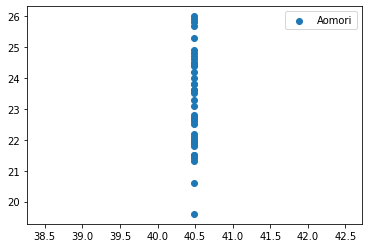

In [6]:
# 散布図として描画する
import matplotlib.pyplot as plt
plt.scatter(aomori_longi, aomori_ave, label='Aomori')
#判例を表示する
plt.legend()
plt.show()

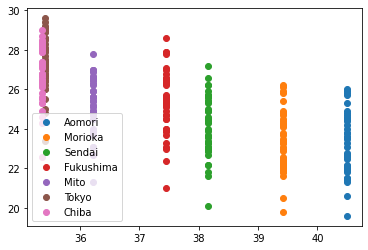

In [7]:
# 同様に盛岡，仙台，福島，水戸，千葉，東京の太平洋側の県庁所在地各地についても行い，散布図として追加描画する
# セルが違う = 描画されるグラフが違うので，まず青森を再描画する
plt.scatter(aomori_longi, aomori_ave, label='Aomori')

# 盛岡以南
morioka_ave = df.loc[:, '盛岡.ave'].values.astype('float32')
morioka_longi = np.repeat(39.42, 42) #盛岡市は北緯39.42
plt.scatter(morioka_longi, morioka_ave, label='Morioka')

sendai_ave = df.loc[:, '仙台.ave'].values.astype('float32')
sendai_longi = np.repeat(38.16, 42) #仙台市は北緯38.16
plt.scatter(sendai_longi, sendai_ave, label='Sendai')

fukushima_ave = df.loc[:, '福島.ave'].values.astype('float32')
fukushima_longi = np.repeat(37.45, 42) #福島市は北緯37.45
plt.scatter(fukushima_longi, fukushima_ave, label='Fukushima')

mito_ave = df.loc[:, '水戸.ave'].values.astype('float32')
mito_longi = np.repeat(36.22, 42) #水戸市は北緯36．22
plt.scatter(mito_longi, mito_ave, label='Mito')

tokyo_ave = df.loc[:, '東京.ave'].values.astype('float32')
tokyo_longi = np.repeat(35.41, 42) #千代田区役所は北緯35.41
plt.scatter(tokyo_longi, tokyo_ave, label='Tokyo')

chiba_ave = df.loc[:, '千葉.ave'].values.astype('float32')
chiba_longi = np.repeat(35.36, 42) #千葉市は北緯35.36
plt.scatter(chiba_longi, chiba_ave, label='Chiba')

plt.legend()
plt.show()

In [8]:
# さてここまでできたら，緯度と8月の平均気温の相関を計算する

# 北から順番に8月の平均気温配列と，緯度配列を連携つしていく．
# 順番を間違えると，緯度と気温の対応が取れなくなる
all_point_ave = np.concatenate([aomori_ave, morioka_ave, sendai_ave, fukushima_ave, mito_ave, tokyo_ave, chiba_ave])
all_point_longi = np.concatenate([aomori_longi, morioka_longi, sendai_longi, fukushima_longi, mito_longi, tokyo_longi, chiba_longi])

# pandasのSeriesに変換する
# pandasの2次元の表がDataFrameで，1次元配列がSeries
all_point_ave_series = pd.Series(all_point_ave)
all_point_longi_series = pd.Series(all_point_longi)

# 相関を計算する
correlation_coefficient = all_point_longi_series.corr(all_point_ave_series)

print('東日本の太平洋側の都市の緯度と8月の平均気温の相関係数は', correlation_coefficient)

東日本の太平洋側の都市の緯度と8月の平均気温の相関係数は -0.6768226395347305


In [9]:
# 8月の日最高気温の平均，8月の日最低気温の平均，25度以上の日数をそれぞれ格納する
aomori_max_ave = df.loc[:, '青森.max.ave'].values.astype('float32')
aomori_min_ave = df.loc[:, '青森.min.ave'].values.astype('float32')
aomori_count_25over = df.loc[:, '青森.25over'].values.astype('uint8') #日数は0もしくは正の整数なので

morioka_max_ave = df.loc[:, '盛岡.max.ave'].values.astype('float32')
morioka_min_ave = df.loc[:, '盛岡.min.ave'].values.astype('float32')
morioka_count_25over = df.loc[:, '盛岡.25over'].values.astype('uint8')

sendai_max_ave = df.loc[:, '仙台.max.ave'].values.astype('float32')
sendai_min_ave = df.loc[:, '仙台.min.ave'].values.astype('float32')
sendai_count_25over = df.loc[:, '仙台.25over'].values.astype('uint8')

fukushima_max_ave = df.loc[:, '福島.max.ave'].values.astype('float32')
fukushima_min_ave = df.loc[:, '福島.min.ave'].values.astype('float32')
fukushima_count_25over = df.loc[:, '福島.25over'].values.astype('uint8')

mito_max_ave = df.loc[:, '水戸.max.ave'].values.astype('float32')
mito_min_ave = df.loc[:, '水戸.min.ave'].values.astype('float32')
mito_count_25over = df.loc[:, '水戸.25over'].values.astype('uint8')

tokyo_max_ave = df.loc[:, '東京.max.ave'].values.astype('float32')
tokyo_min_ave = df.loc[:, '東京.min.ave'].values.astype('float32')
tokyo_count_25over = df.loc[:, '東京.25over'].values.astype('uint8')

chiba_max_ave = df.loc[:, '千葉.max.ave'].values.astype('float32')
chiba_min_ave = df.loc[:, '千葉.min.ave'].values.astype('float32')
chiba_count_25over = df.loc[:, '千葉.25over'].values.astype('uint8')

# 連結する
all_point_max_ave = np.concatenate([aomori_max_ave, morioka_max_ave, sendai_max_ave, fukushima_max_ave, mito_max_ave, tokyo_max_ave, chiba_max_ave])
all_point_min_ave = np.concatenate([aomori_min_ave, morioka_min_ave, sendai_min_ave, fukushima_min_ave, mito_min_ave, tokyo_min_ave, chiba_min_ave])
all_point_count_25over = np.concatenate([aomori_count_25over, morioka_count_25over, sendai_count_25over, fukushima_count_25over, mito_count_25over, tokyo_count_25over, chiba_count_25over])

# pandasのSeriesに変換
all_point_max_ave_series = pd.Series(all_point_max_ave)
all_point_min_ave_series = pd.Series(all_point_min_ave)
all_point_count_25over_series = pd.Series(all_point_count_25over)

# 相関係数を出す
coefficient_max_ave = all_point_longi_series.corr(all_point_max_ave_series)
coefficient_min_ave = all_point_longi_series.corr(all_point_min_ave_series)
coefficient_count_25over = all_point_longi_series.corr(all_point_count_25over_series)

print('東日本の太平洋側の都市の緯度と8月の日最高気温平均の相関係数は', coefficient_max_ave)
print('東日本の太平洋側の都市の緯度と8月の日最低気温平均の相関係数は', coefficient_min_ave)
print('東日本の太平洋側の都市の緯度と8月の25℃を超えた日数の相関係数は', coefficient_count_25over)

東日本の太平洋側の都市の緯度と8月の日最高気温平均の相関係数は -0.5206503321172122
東日本の太平洋側の都市の緯度と8月の日最低気温平均の相関係数は -0.7595445362207282
東日本の太平洋側の都市の緯度と8月の25℃を超えた日数の相関係数は -0.6830720670305753
